In [2]:
import yfinance as yf # yahoo finance مكتبة لتحميل الأوراق المالية من موقع  
import pandas_ta as ta
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
aapl = yf.download('AAPL',start=dt.datetime(2022,1,1))

[*********************100%***********************]  1 of 1 completed


In [3]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,177.830002,182.880005,177.710007,182.009995,180.959747,104487900
2022-01-04 00:00:00-05:00,182.630005,182.940002,179.119995,179.699997,178.663086,99310400
2022-01-05 00:00:00-05:00,179.610001,180.169998,174.639999,174.919998,173.910645,94537600
2022-01-06 00:00:00-05:00,172.699997,175.300003,171.639999,172.000000,171.007523,96904000
2022-01-07 00:00:00-05:00,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,135.449997,85928000


In [4]:
# clip 
aapl['delta'] = delta = aapl['Close'].diff() # الفرق 
aapl['up'] = up = delta.clip(lower=0) # الذي أدنى من الصفر إجعله صفر 
aapl['down'] = down = -1*delta.clip(upper=0) # الذي أعلى من الصفر إجعله صفر 
aapl

,Open,High,Low,Close,Adj Close,Volume,delta,up,down
Date,,,,,,,,,
2022-01-03 00:00:00-05:00,177.830002,182.880005,177.710007,182.009995,180.959747,104487900,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,182.630005,182.940002,179.119995,179.699997,178.663086,99310400,-2.309998,0.000000,2.309998
2022-01-05 00:00:00-05:00,179.610001,180.169998,174.639999,174.919998,173.910645,94537600,-4.779999,0.000000,4.779999
2022-01-06 00:00:00-05:00,172.699997,175.300003,171.639999,172.000000,171.007523,96904000,-2.919998,0.000000,2.919998
2022-01-07 00:00:00-05:00,172.889999,174.139999,171.029999,172.169998,171.176529,86709100,0.169998,0.169998,-0.000000
...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,132.369995,79592600,-2.139999,0.000000,2.139999
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,132.300003,77432800,-0.069992,0.000000,0.069992
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,135.449997,85928000,3.149994,3.149994,-0.000000


In [5]:
# RSI مؤشر القوة النسبية
# صراحة لم أدرس تفاصيل حسابه 
ema_up = up.ewm(com=13).mean()
ema_down = down.ewm(com=13).mean()
rs = ema_up/ema_down
aapl['RSI'] = 100 -(100/( 1+ rs) )
aapl

,Open,High,Low,Close,Adj Close,Volume,delta,up,down,RSI
Date,,,,,,,,,,
2022-01-03 00:00:00-05:00,177.830002,182.880005,177.710007,182.009995,180.959747,104487900,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,182.630005,182.940002,179.119995,179.699997,178.663086,99310400,-2.309998,0.000000,2.309998,0.000000
2022-01-05 00:00:00-05:00,179.610001,180.169998,174.639999,174.919998,173.910645,94537600,-4.779999,0.000000,4.779999,0.000000
2022-01-06 00:00:00-05:00,172.699997,175.300003,171.639999,172.000000,171.007523,96904000,-2.919998,0.000000,2.919998,0.000000
2022-01-07 00:00:00-05:00,172.889999,174.139999,171.029999,172.169998,171.176529,86709100,0.169998,0.169998,-0.000000,1.920348
...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,132.369995,79592600,-2.139999,0.000000,2.139999,33.700592
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,132.300003,77432800,-0.069992,0.000000,0.069992,33.630161
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,135.449997,85928000,3.149994,3.149994,-0.000000,39.734507


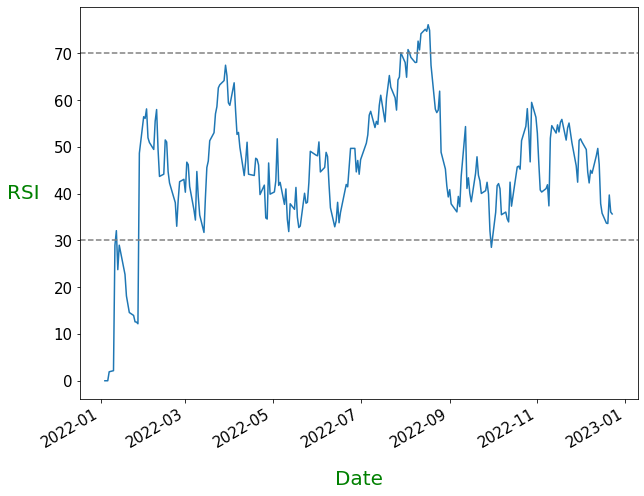

In [6]:
# ينصح المحللون بعد تجاوز خط 30 أن تشتري أي هبط أسفله وصعد  
# عند الإقتراب من 70 أن تبيع 
fig ,ax = plt.subplots(figsize=(10,8))
aapl['RSI'].plot(ax=ax)
plt.axhline(70, color='gray', linestyle='--')
plt.axhline(30, color='gray', linestyle='--',)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Date',fontdict={'fontsize':20,'color':'g'},labelpad=20)
plt.ylabel('RSI',fontdict={'fontsize':20,'color':'g'},rotation=0,labelpad=30)
plt.savefig('RSI.png',bbox_inches='tight',pad_inches=1.5,facecolor='w')

In [7]:
import pandas_datareader.data as web

In [8]:
# متوسط أداء القطاعات 
data = web.get_sector_performance_av(api_key = '75ca5bbeaefe696f')
data

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Energy,3.16%,3.16%,4.38%,-6.05%,14.86%,58.09%,59.90%,47.70%,25.54%,24.22%
Communication Services,1.08%,1.08%,-0.40%,-4.58%,-6.23%,-40.37%,-40.43%,-12.75%,-4.36%,9.19%
Utilities,1.05%,1.05%,1.42%,2.27%,-2.22%,-0.80%,1.78%,9.92%,35.34%,100.88%
Real Estate,0.88%,0.88%,-0.01%,-3.02%,-1.90%,-28.01%,-25.62%,-1.72%,16.14%,NaN
Materials,0.71%,0.72%,-0.10%,-3.96%,12.61%,-13.03%,-9.89%,29.66%,30.89%,111.38%
Consumer Discretionary,0.71%,0.71%,-3.10%,-7.67%,-14.32%,-37.41%,-36.37%,3.14%,27.88%,169.16%
Financials,0.62%,0.62%,1.40%,-4.85%,7.76%,-12.95%,-11.99%,10.92%,21.29%,155.64%
Industrials,0.57%,0.57%,0.76%,-1.83%,13.89%,-6.94%,-4.18%,21.06%,30.81%,153.17%
Consumer Staples,0.53%,0.53%,1.00%,-0.78%,6.59%,-2.33%,0.28%,21.09%,33.81%,115.71%
Information Technology,0.12%,0.12%,-2.04%,-6.45%,-1.13%,-28.80%,-28.06%,36.22%,94.63%,368.37%


In [9]:
# متوسط أداء القطاعات في السنة الأخيرة 
data['1Y']

Energy                     59.90%
Communication Services    -40.43%
Utilities                   1.78%
Real Estate               -25.62%
Materials                  -9.89%
Consumer Discretionary    -36.37%
Financials                -11.99%
Industrials                -4.18%
Consumer Staples            0.28%
Information Technology    -28.06%
Health Care                -1.88%
Name: 1Y, dtype: object

In [10]:
# strip : من دون إدخال قيمة تقص المسافات البيضاء من اليسار واليمين
data['1Y'].str.strip('%')

Energy                     59.90
Communication Services    -40.43
Utilities                   1.78
Real Estate               -25.62
Materials                  -9.89
Consumer Discretionary    -36.37
Financials                -11.99
Industrials                -4.18
Consumer Staples            0.28
Information Technology    -28.06
Health Care                -1.88
Name: 1Y, dtype: object

In [11]:
# هنا قص المدخل من اليمين 
for column in data.columns:
    data[column] = data[column].str.rstrip('%').astype('float') 
data 

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Energy,3.16,3.16,4.38,-6.05,14.86,58.09,59.90,47.70,25.54,24.22
Communication Services,1.08,1.08,-0.40,-4.58,-6.23,-40.37,-40.43,-12.75,-4.36,9.19
Utilities,1.05,1.05,1.42,2.27,-2.22,-0.80,1.78,9.92,35.34,100.88
Real Estate,0.88,0.88,-0.01,-3.02,-1.90,-28.01,-25.62,-1.72,16.14,NaN
Materials,0.71,0.72,-0.10,-3.96,12.61,-13.03,-9.89,29.66,30.89,111.38
Consumer Discretionary,0.71,0.71,-3.10,-7.67,-14.32,-37.41,-36.37,3.14,27.88,169.16
Financials,0.62,0.62,1.40,-4.85,7.76,-12.95,-11.99,10.92,21.29,155.64
Industrials,0.57,0.57,0.76,-1.83,13.89,-6.94,-4.18,21.06,30.81,153.17
Consumer Staples,0.53,0.53,1.00,-0.78,6.59,-2.33,0.28,21.09,33.81,115.71
Information Technology,0.12,0.12,-2.04,-6.45,-1.13,-28.80,-28.06,36.22,94.63,368.37


In [12]:
data / 100 # التخلص من النسبة المئوية 
#  خلال 10 سنوات زادت  ضعف3.3744 Information Technology أي عند  

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Energy,0.0316,0.0316,0.0438,-0.0605,0.1486,0.5809,0.5990,0.4770,0.2554,0.2422
Communication Services,0.0108,0.0108,-0.0040,-0.0458,-0.0623,-0.4037,-0.4043,-0.1275,-0.0436,0.0919
Utilities,0.0105,0.0105,0.0142,0.0227,-0.0222,-0.0080,0.0178,0.0992,0.3534,1.0088
Real Estate,0.0088,0.0088,-0.0001,-0.0302,-0.0190,-0.2801,-0.2562,-0.0172,0.1614,NaN
Materials,0.0071,0.0072,-0.0010,-0.0396,0.1261,-0.1303,-0.0989,0.2966,0.3089,1.1138
Consumer Discretionary,0.0071,0.0071,-0.0310,-0.0767,-0.1432,-0.3741,-0.3637,0.0314,0.2788,1.6916
Financials,0.0062,0.0062,0.0140,-0.0485,0.0776,-0.1295,-0.1199,0.1092,0.2129,1.5564
Industrials,0.0057,0.0057,0.0076,-0.0183,0.1389,-0.0694,-0.0418,0.2106,0.3081,1.5317
Consumer Staples,0.0053,0.0053,0.0100,-0.0078,0.0659,-0.0233,0.0028,0.2109,0.3381,1.1571
Information Technology,0.0012,0.0012,-0.0204,-0.0645,-0.0113,-0.2880,-0.2806,0.3622,0.9463,3.6837


In [13]:
# CAGR معدل النمو السنوي المركب 
data['1Y CAGR'] = data['1Y'] 
data['3Y CAGR'] = ((1+data['3Y'] **(1/3)) - 1) 
data['5Y CAGR'] = ((1+data['5Y'] **(1/5)) - 1)
data['10Y CAGR'] = ((1+data['10Y'] **(1/10)) - 1) 

In [14]:
cols = ['1Y CAGR','3Y CAGR','5Y CAGR','10Y CAGR']
df = data[cols]

In [15]:
df

,1Y CAGR,3Y CAGR,5Y CAGR,10Y CAGR
Energy,59.90,3.626654,1.911808,1.375363
Communication Services,-40.43,NaN,NaN,1.248336
Utilities,1.78,2.148674,2.040109,1.586282
Real Estate,-25.62,NaN,1.744137,NaN
Materials,-9.89,3.095449,1.985928,1.602067
Consumer Discretionary,-36.37,1.464344,1.945622,1.670436
Financials,-11.99,2.218576,1.843466,1.656579
Industrials,-4.18,2.761549,1.984899,1.653931
Consumer Staples,0.28,2.762860,2.022130,1.608189
Information Technology,-28.06,3.308640,2.484310,1.805629


In [16]:
%matplotlib inline

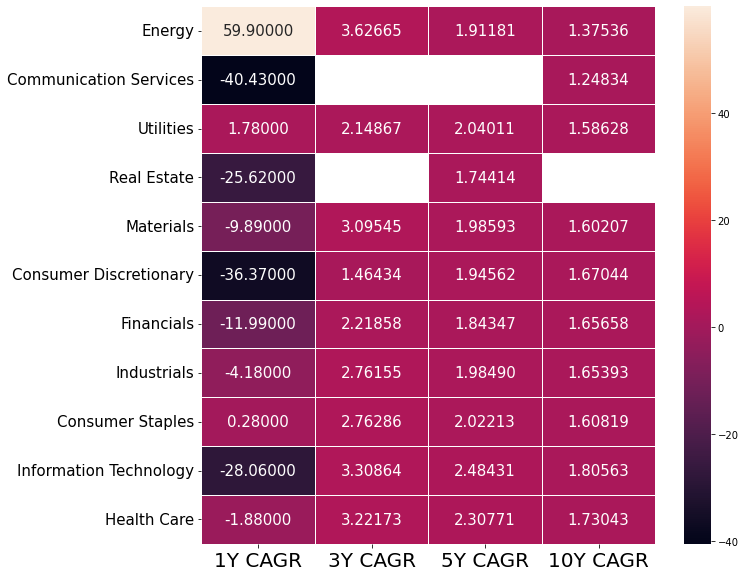

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data[cols],annot=True,fmt='.5f',annot_kws={'size':15},linewidths=1)
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()


In [9]:
df = pd.DataFrame()

In [10]:
aapl  = df.ta.ticker('aapl',period='1y',interval='1d')
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-27 00:00:00-05:00,176.068149,179.378936,176.048276,179.289459,74919600,0.0,0
2021-12-28 00:00:00-05:00,179.120422,180.283669,177.499823,178.255432,79144300,0.0,0
2021-12-29 00:00:00-05:00,178.295210,179.587712,177.112075,178.344925,62348900,0.0,0
2021-12-30 00:00:00-05:00,178.434398,179.528057,177.062357,177.171722,59773000,0.0,0
2021-12-31 00:00:00-05:00,177.062353,178.195774,176.237140,176.545364,64062300,0.0,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,85928000,0.0,0


In [11]:
meta  = df.ta.ticker('meta',period='1y',interval='1d')
meta

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-27 00:00:00-05:00,338.850006,347.869995,338.010010,346.179993,17795000,0,0
2021-12-28 00:00:00-05:00,346.630005,352.709991,345.200012,346.220001,16637600,0,0
2021-12-29 00:00:00-05:00,346.910004,349.690002,341.640015,342.940002,10747000,0,0
2021-12-30 00:00:00-05:00,344.000000,347.230011,343.220001,344.359985,10593300,0,0
2021-12-31 00:00:00-05:00,343.019989,343.440002,336.269989,336.350006,12870500,0,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,116.830002,117.800003,114.330002,114.480003,29769900,0,0
2022-12-20 00:00:00-05:00,113.260002,117.330002,112.459999,117.089996,28742500,0,0
2022-12-21 00:00:00-05:00,116.699997,120.339996,115.620003,119.760002,20392800,0,0


In [12]:
msft  = df.ta.ticker('msft',period='1y',interval='1d')
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-27 00:00:00-05:00,332.345865,339.300716,332.316144,339.270996,19947000,0.0,0
2021-12-28 00:00:00-05:00,339.964479,340.618356,337.160763,338.082123,15661500,0.0,0
2021-12-29 00:00:00-05:00,338.131645,341.103795,336.526688,338.775635,15042000,0.0,0
2021-12-30 00:00:00-05:00,338.736028,339.944704,335.674716,336.170074,15994500,0.0,0
2021-12-31 00:00:00-05:00,335.367579,336.209664,332.732268,333.197906,18000800,0.0,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,244.860001,245.210007,238.710007,240.449997,29696400,0.0,0
2022-12-20 00:00:00-05:00,239.399994,242.910004,238.419998,241.800003,25150800,0.0,0
2022-12-21 00:00:00-05:00,241.690002,245.619995,240.110001,244.429993,23690600,0.0,0


In [13]:
tsla  = df.ta.ticker('tsla',period='1y',interval='1d')
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-27 00:00:00-05:00,357.890015,372.333344,356.906677,364.646667,71145900,0,0.0
2021-12-28 00:00:00-05:00,369.829987,373.000000,359.473328,362.823334,60324000,0,0.0
2021-12-29 00:00:00-05:00,366.213318,368.000000,354.713318,362.063324,56154000,0,0.0
2021-12-30 00:00:00-05:00,353.776672,365.183319,351.049988,356.779999,47040900,0,0.0
2021-12-31 00:00:00-05:00,357.813324,360.666656,351.529999,352.260010,40733700,0,0.0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,154.000000,155.250000,145.820007,149.869995,139390600,0,0.0
2022-12-20 00:00:00-05:00,146.050003,148.470001,137.660004,137.800003,159563300,0,0.0
2022-12-21 00:00:00-05:00,139.339996,141.259995,135.889999,137.570007,145417400,0,0.0


In [24]:
df_1 = pd.merge(left=aapl, right=tsla, left_index=True, right_index =True, suffixes=('_AAPL','_TSLA') )
df_1

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Dividends_AAPL,Stock Splits_AAPL,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Volume_TSLA,Dividends_TSLA,Stock Splits_TSLA
Date,,,,,,,,,,,,,,
2021-12-27 00:00:00-05:00,176.068149,179.378936,176.048276,179.289459,74919600,0.0,0,357.890015,372.333344,356.906677,364.646667,71145900,0,0.0
2021-12-28 00:00:00-05:00,179.120422,180.283669,177.499823,178.255432,79144300,0.0,0,369.829987,373.000000,359.473328,362.823334,60324000,0,0.0
2021-12-29 00:00:00-05:00,178.295210,179.587712,177.112075,178.344925,62348900,0.0,0,366.213318,368.000000,354.713318,362.063324,56154000,0,0.0
2021-12-30 00:00:00-05:00,178.434398,179.528057,177.062357,177.171722,59773000,0.0,0,353.776672,365.183319,351.049988,356.779999,47040900,0,0.0
2021-12-31 00:00:00-05:00,177.062353,178.195774,176.237140,176.545364,64062300,0.0,0,357.813324,360.666656,351.529999,352.260010,40733700,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0,154.000000,155.250000,145.820007,149.869995,139390600,0,0.0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0,146.050003,148.470001,137.660004,137.800003,159563300,0,0.0
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,85928000,0.0,0,139.339996,141.259995,135.889999,137.570007,145417400,0,0.0


In [25]:
df_2 = pd.merge(left=meta, right=msft, left_index=True, right_index =True, suffixes=('_META','_MSFT') )
df_2

,Open_META,High_META,Low_META,Close_META,Volume_META,Dividends_META,Stock Splits_META,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,Volume_MSFT,Dividends_MSFT,Stock Splits_MSFT
Date,,,,,,,,,,,,,,
2021-12-27 00:00:00-05:00,338.850006,347.869995,338.010010,346.179993,17795000,0,0,332.345865,339.300716,332.316144,339.270996,19947000,0.0,0
2021-12-28 00:00:00-05:00,346.630005,352.709991,345.200012,346.220001,16637600,0,0,339.964479,340.618356,337.160763,338.082123,15661500,0.0,0
2021-12-29 00:00:00-05:00,346.910004,349.690002,341.640015,342.940002,10747000,0,0,338.131645,341.103795,336.526688,338.775635,15042000,0.0,0
2021-12-30 00:00:00-05:00,344.000000,347.230011,343.220001,344.359985,10593300,0,0,338.736028,339.944704,335.674716,336.170074,15994500,0.0,0
2021-12-31 00:00:00-05:00,343.019989,343.440002,336.269989,336.350006,12870500,0,0,335.367579,336.209664,332.732268,333.197906,18000800,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,116.830002,117.800003,114.330002,114.480003,29769900,0,0,244.860001,245.210007,238.710007,240.449997,29696400,0.0,0
2022-12-20 00:00:00-05:00,113.260002,117.330002,112.459999,117.089996,28742500,0,0,239.399994,242.910004,238.419998,241.800003,25150800,0.0,0
2022-12-21 00:00:00-05:00,116.699997,120.339996,115.620003,119.760002,20392800,0,0,241.690002,245.619995,240.110001,244.429993,23690600,0.0,0


In [26]:
df= pd.merge(left=df_1, right=df_2, left_index=True, right_index =True, suffixes=('','') )
df

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Dividends_AAPL,Stock Splits_AAPL,Open_TSLA,High_TSLA,Low_TSLA,...,Volume_META,Dividends_META,Stock Splits_META,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,Volume_MSFT,Dividends_MSFT,Stock Splits_MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-27 00:00:00-05:00,176.068149,179.378936,176.048276,179.289459,74919600,0.0,0,357.890015,372.333344,356.906677,...,17795000,0,0,332.345865,339.300716,332.316144,339.270996,19947000,0.0,0
2021-12-28 00:00:00-05:00,179.120422,180.283669,177.499823,178.255432,79144300,0.0,0,369.829987,373.000000,359.473328,...,16637600,0,0,339.964479,340.618356,337.160763,338.082123,15661500,0.0,0
2021-12-29 00:00:00-05:00,178.295210,179.587712,177.112075,178.344925,62348900,0.0,0,366.213318,368.000000,354.713318,...,10747000,0,0,338.131645,341.103795,336.526688,338.775635,15042000,0.0,0
2021-12-30 00:00:00-05:00,178.434398,179.528057,177.062357,177.171722,59773000,0.0,0,353.776672,365.183319,351.049988,...,10593300,0,0,338.736028,339.944704,335.674716,336.170074,15994500,0.0,0
2021-12-31 00:00:00-05:00,177.062353,178.195774,176.237140,176.545364,64062300,0.0,0,357.813324,360.666656,351.529999,...,12870500,0,0,335.367579,336.209664,332.732268,333.197906,18000800,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0,154.000000,155.250000,145.820007,...,29769900,0,0,244.860001,245.210007,238.710007,240.449997,29696400,0.0,0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0,146.050003,148.470001,137.660004,...,28742500,0,0,239.399994,242.910004,238.419998,241.800003,25150800,0.0,0
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,85928000,0.0,0,139.339996,141.259995,135.889999,...,20392800,0,0,241.690002,245.619995,240.110001,244.429993,23690600,0.0,0


In [29]:
data = df.filter(['Close_AAPL','Close_META','Close_TSLA','Close_MSFT'])
data

,Close_AAPL,Close_META,Close_TSLA,Close_MSFT
Date,,,,
2021-12-27 00:00:00-05:00,179.289459,346.179993,364.646667,339.270996
2021-12-28 00:00:00-05:00,178.255432,346.220001,362.823334,338.082123
2021-12-29 00:00:00-05:00,178.344925,342.940002,362.063324,338.775635
2021-12-30 00:00:00-05:00,177.171722,344.359985,356.779999,336.170074
2021-12-31 00:00:00-05:00,176.545364,336.350006,352.260010,333.197906
...,...,...,...,...
2022-12-19 00:00:00-05:00,132.369995,114.480003,149.869995,240.449997
2022-12-20 00:00:00-05:00,132.300003,117.089996,137.800003,241.800003
2022-12-21 00:00:00-05:00,135.449997,119.760002,137.570007,244.429993


In [30]:
log_returns = np.log(data/data.shift())
log_returns

,Close_AAPL,Close_META,Close_TSLA,Close_MSFT
Date,,,,
2021-12-27 00:00:00-05:00,NaN,NaN,NaN,NaN
2021-12-28 00:00:00-05:00,-0.005784,0.000116,-0.005013,-0.003510
2021-12-29 00:00:00-05:00,0.000502,-0.009519,-0.002097,0.002049
2021-12-30 00:00:00-05:00,-0.006600,0.004132,-0.014700,-0.007721
2021-12-31 00:00:00-05:00,-0.003542,-0.023535,-0.012750,-0.008881
...,...,...,...,...
2022-12-19 00:00:00-05:00,-0.016038,-0.042330,-0.002399,-0.017480
2022-12-20 00:00:00-05:00,-0.000529,0.022543,-0.083965,0.005599
2022-12-21 00:00:00-05:00,0.023530,0.022547,-0.001670,0.010818


In [31]:
log_returns.corr()

,Close_AAPL,Close_META,Close_TSLA,Close_MSFT
Close_AAPL,1.000000,0.570534,0.645088,0.821693
Close_META,0.570534,1.000000,0.375476,0.604177
Close_TSLA,0.645088,0.375476,1.000000,0.550689
Close_MSFT,0.821693,0.604177,0.550689,1.000000


In [32]:
a = pd.DataFrame()
sp500 = a.ta.ticker('^GSPC',period='1y',interval='1d')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-27 00:00:00-05:00,4733.990234,4791.490234,4733.990234,4791.189941,2770290000,0,0
2021-12-28 00:00:00-05:00,4795.490234,4807.020020,4780.040039,4786.350098,2707920000,0,0
2021-12-29 00:00:00-05:00,4788.640137,4804.060059,4778.080078,4793.060059,2963310000,0,0
2021-12-30 00:00:00-05:00,4794.229980,4808.930176,4775.330078,4778.729980,3124950000,0,0
2021-12-31 00:00:00-05:00,4775.209961,4786.830078,4765.750000,4766.180176,2677820000,0,0
...,...,...,...,...,...,...,...
2022-12-19 00:00:00-05:00,3853.790039,3854.860107,3800.040039,3817.659912,3969610000,0,0
2022-12-20 00:00:00-05:00,3810.469971,3838.239990,3795.620117,3821.620117,3985370000,0,0
2022-12-21 00:00:00-05:00,3839.489990,3889.820068,3839.489990,3878.439941,3775200000,0,0


In [33]:
log_returns['SP500'] = np.log(sp500['Close']/sp500['Close'].shift())

In [34]:
log_returns.corr()

,Close_AAPL,Close_META,Close_TSLA,Close_MSFT,SP500
Close_AAPL,1.000000,0.570534,0.645088,0.821693,0.885777
Close_META,0.570534,1.000000,0.375476,0.604177,0.629745
Close_TSLA,0.645088,0.375476,1.000000,0.550689,0.642819
Close_MSFT,0.821693,0.604177,0.550689,1.000000,0.876726
SP500,0.885777,0.629745,0.642819,0.876726,1.000000


In [37]:
%matplotlib inline

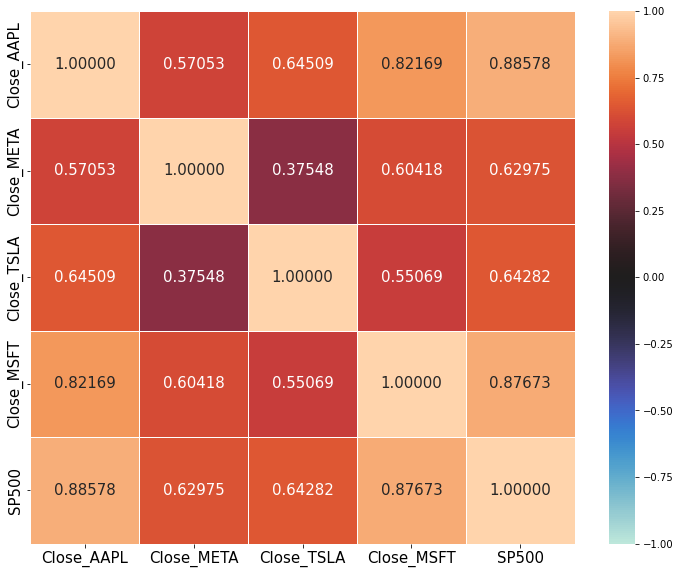

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(log_returns.corr(),annot=True,fmt='.5f',annot_kws={'size':15},linewidths=1,
    center=0,vmin=-1,vmax=1)
plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.show()
